In [1]:
#author irem bakır 
#21732881
import torch
import torch.nn as nn
from pylab import rcParams
from matplotlib import rc
import os
import datetime
from numpy import concatenate
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [5]:
torch.cuda.memory_allocated()

0

In [6]:
torch.cuda.memory_reserved()

0

In [7]:
'''
page = 2011

def get_url(page):
  arr_url =[]
  arr_year = []
  for i in range(0,10):
    url = f"https://data.cosmic.ucar.edu/suominet/postProcess/global/y{page}/"
    arr_url.append(url)
    arr_year.append(page)
    page +=1

  return arr_url, arr_year

def get_index(id):
    array_of_u = get_url(page)[0]
    array_of_y = get_url(page)[1]
    array= []
    for i in range(len(array_of_u)):
      for j in range(1,366):
        url = array_of_u[i]
        if j < 10:
          url_id = f"{url}/{id}_{array_of_y[i]}.00{j}.00.PWV"
        elif 10 <= j < 100 :
            url_id = f"{url}/{id}_{array_of_y[i]}.0{j}.00.PWV"
        else :
          url_id = f"{url}/{id}_{array_of_y[i]}.{j}.00.PWV"
        array.append(url_id)

    return array

'''


'\npage = 2011\n\ndef get_url(page):\n  arr_url =[]\n  array_of_year = []\n  for i in range(0,10):\n    url = f"https://data.cosmic.ucar.edu/suominet/postProcess/global/y{page}/"\n    array_of_url.append(url)\n    array_of_year.append(page)\n    page +=1\n\n  return array_of_url, array_of_year\n\ndef get_index(id):\n    array_of_u = get_url(page)[0]\n    array_of_y = get_url(page)[1]\n    array= []\n    for i in range(len(array_of_u)):\n      for j in range(1,366):\n        url = array_of_u[i]\n        if j < 10:\n          url_id = f"{url}/{id}_{array_of_y[i]}.00{j}.00.PWV"\n        elif 10 <= j < 100 :\n            url_id = f"{url}/{id}_{array_of_y[i]}.0{j}.00.PWV"\n        else :\n          url_id = f"{url}/{id}_{array_of_y[i]}.{j}.00.PWV"\n        array.append(url_id)\n\n    return array\n\n'

In [76]:
'''
path = get_index("GSUd")
f_name = "ankr_tdelay.csv"
df2 = pd.DataFrame()
d = {'PWVmidTim': [], 'Tdelay': []}
df2= pd.DataFrame(data=d)

for i in range(len(path)):
    col_names = ['Site', "PWVmidTim", "Tdelay"]
    df = pd.read_csv(path[i], delimiter='\s+',skipinitialspace=True, usecols=col_names, parse_dates = True)
    df = df.loc[df['Site'] == "ANKR"]
    df.drop(['Site'], axis=1, inplace=True)
    df2 = df2.append(df)
  
df2.to_csv(file_name, encoding='utf-8',header=True,index=False)
'''

'\n#def get_attributes():\n\n\npath = get_index("GSUd")\nf_name = "ankr_tdelay.csv"\ndf2 = pd.DataFrame()\nd = {\'PWVmidTim\': [], \'Tdelay\': []}\ndf2= pd.DataFrame(data=d)\n\nfor i in range(len(path)):\n    col_names = [\'Site\', "PWVmidTim", "Tdelay"]\n    df = pd.read_csv(path[i], delimiter=\'\\s+\',skipinitialspace=True, usecols=col_names, parse_dates = True)\n    df = df.loc[df[\'Site\'] == "ANKR"]\n    df.drop([\'Site\'], axis=1, inplace=True)\n    df2 = df2.append(df)\n  \ndf2.to_csv(file_name, encoding=\'utf-8\',header=True,index=False)\n\n\n'

In [8]:
path="https://raw.githubusercontent.com/ireemiinii/muh_ozel_konular/main/ankr_tdelay.csv"
df = pd.read_csv(path, sep=",", index_col="PWVmidTim", parse_dates = True)
df=df.filter(["PWVmidTim","Tdelay"])
df

,Tdelay
PWVmidTim,
2011-01-01 00:15:00,2101.0
2011-01-01 00:45:00,2100.3
2011-01-01 01:15:00,2105.5
2011-01-01 01:45:00,2106.2
2011-01-01 02:15:00,2104.4
...,...
2020-12-31 21:45:00,2102.0
2020-12-31 22:15:00,2110.2
2020-12-31 22:45:00,2116.2


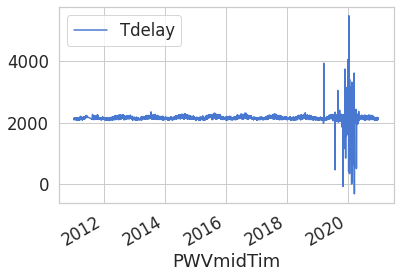

In [9]:
df.plot()

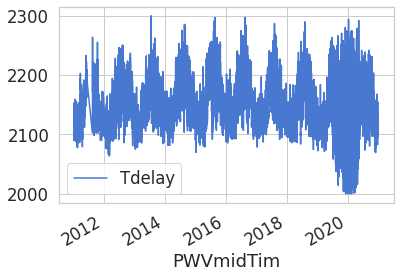

In [11]:
df = df[df.Tdelay > 2000]
df = df[df.Tdelay < 2300] 
df.plot()

In [12]:
df = df.resample('W').mean()
df

,Tdelay
PWVmidTim,
2011-01-02,2107.600000
2011-01-09,2136.797872
2011-01-16,2129.640854
2011-01-23,2129.366055
2011-01-30,2113.210638
...,...
2020-12-06,2112.494208
2020-12-13,2131.796875
2020-12-20,2131.497500


In [13]:
df["Tdelay"].isnull().sum()

16

In [14]:
df = df.fillna(df.mean())


In [15]:
df["Tdelay"].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


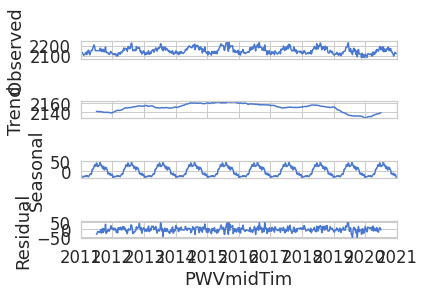

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Tdelay"], model='additive')
result.plot();

In [17]:
len(df)

523

In [18]:
y = df['Tdelay'].values.astype(float)

test_size = 52*2
window_size = 52*4   # 4 years

train_set = y[:-test_size]
test_set = y[-test_size:]


scaler = MinMaxScaler(feature_range=(-1, 1))
train_set = scaler.fit_transform(train_set.reshape(-1,1))
test_set = scaler.transform(test_set.reshape(-1,1))

# Run the code below to check your results:
print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')
print(f'Train Shape: {train_set.shape}')
print(f'Test Shape:  {test_set.shape}')

Train: 419
Test:  104
Train Shape: (419, 1)
Test Shape:  (104, 1)


In [19]:
# Run the code below to check your results:
print(f'First item, original: {y[0]}')
print(f'First item, scaled:  {train_set[0]}')

First item, original: 2107.6
First item, scaled:  [-0.83752031]


In [20]:
train_norm = torch.FloatTensor(train_set).view(-1).cuda()

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [21]:
train_data = input_data(train_norm, window_size)
print(f'Train_data: {len(train_data)}')

Train_data: 211


In [23]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=13,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size).cuda(),
                       torch.zeros(1,1,self.hidden_size).cuda())

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]
    
torch.manual_seed(101)
model = LSTMnetwork().cuda()
model

LSTMnetwork(
  (lstm): LSTM(1, 13)
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

In [24]:
next(model.parameters()).is_cuda

True

In [25]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
epochs = 50
hist = np.zeros(epochs)


for i in range(epochs):
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size).cuda(),
                        torch.zeros(1,1,model.hidden_size).cuda())
        
        # apply the model
        y_pred = model(seq)
        
        # update parameters
        loss = criterion(y_pred, y_train)
        hist[i]=loss.item()
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    if i % 5 == 0 and i !=0:
      print("Epoch ", i, "Train Loss: {}".format(loss.item()))

Epoch  5 Train Loss: 0.06521409004926682
Epoch  10 Train Loss: 0.05612744390964508
Epoch  15 Train Loss: 0.07098899036645889
Epoch  20 Train Loss: 0.07685209065675735
Epoch  25 Train Loss: 0.0802747905254364
Epoch  30 Train Loss: 0.08251053094863892
Epoch  35 Train Loss: 0.08586673438549042
Epoch  40 Train Loss: 0.08910688012838364
Epoch  45 Train Loss: 0.090055912733078


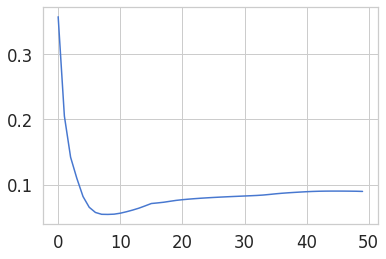

In [27]:
plt.plot(hist)

In [28]:
future = 104
preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:]).cuda()
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size).cuda(),
                        torch.zeros(1,1,model.hidden_size).cuda())
        preds.append(model(seq).item())
        
preds[window_size:]

[-0.5173683762550354,
 -0.5108783841133118,
 -0.5011418461799622,
 -0.4961948096752167,
 -0.4950403571128845,
 -0.49725964665412903,
 -0.5025961399078369,
 -0.510826587677002,
 -0.5215284824371338,
 -0.5335466265678406,
 -0.5440618991851807,
 -0.5477350950241089,
 -0.5375295877456665,
 -0.5082356333732605,
 -0.45945918560028076,
 -0.39397555589675903,
 -0.3138467073440552,
 -0.21913380920886993,
 -0.11011049151420593,
 0.008108898997306824,
 0.11914736032485962,
 0.1962740421295166,
 0.2280483841896057,
 0.2331077754497528,
 0.2326609194278717,
 0.23655790090560913,
 0.2551768720149994,
 0.3146466612815857,
 0.4289146065711975,
 0.4995519518852234,
 0.441122829914093,
 0.3144325911998749,
 0.22703620791435242,
 0.18545392155647278,
 0.15898597240447998,
 0.13405591249465942,
 0.1054358184337616,
 0.07002611458301544,
 0.025838911533355713,
 -0.028132468461990356,
 -0.09177619218826294,
 -0.16335614025592804,
 -0.23882147669792175,
 -0.31192547082901,
 -0.37603986263275146,
 -0.42675441

In [29]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
test_set = scaler.inverse_transform(np.array(test_set.reshape(-1, 1)))

In [30]:
test_data = df[-test_size:]
test_data["Predictions"] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
test_data.head()

,Tdelay,Predictions
PWVmidTim,,
2019-01-13,2106.048710,2129.794985
2019-01-20,2112.447805,2130.244913
2019-01-27,2119.528274,2130.919912
2019-02-03,2114.386250,2131.262873
2019-02-10,2132.334524,2131.342907


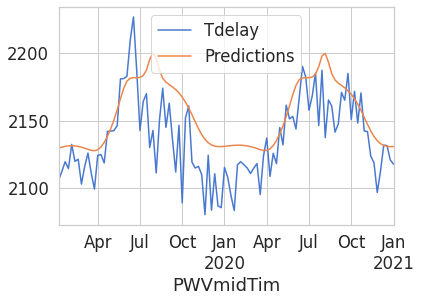

In [32]:
test_data.plot()

In [33]:
mae = mean_squared_error(test_data['Tdelay'],test_data['Predictions'])
rmse = np.sqrt(mean_squared_error(test_data['Tdelay'],test_data['Predictions']))
  
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)

MAE: 746.228
RMSE: 27.317


In [34]:
test_data.mean()

Tdelay         2136.103673
Predictions    2153.843704
dtype: float64